# Generating image data
In this notebook we use [bia-bob](https://github.com/haesleinhuepf/bia-bob) to generate code for us that generates image data.
Such simulated images might be useful for testing image processing algorithms on images with specified characteristics.

In [1]:
from dotenv import load_dotenv
load_dotenv()

import os
from bia_bob import bob
bob.initialize(endpoint='https://chat-ai.academiccloud.de/v1', model='openai-gpt-oss-120b', api_key=os.environ.get('KISSKI_API_KEY'))
#bob.initialize(endpoint='https://llm.scads.ai/v1', model='openai/gpt-oss-120b', api_key=os.environ.get('SCADSAI_API_KEY'))

In [2]:
%%bob 
Write a for-loop that generates 256x256 sized numpy arrays / images.
The images should contain blurry bright objects on dark background.
The more objects are in the images, the smaller the sigma for the Gaussian blur.
The relationship between number of objects and sigma is exponential.

I will create a loop that builds several 256 × 256 NumPy images.  
Each image starts as a dark background with a given number of bright point‑like objects placed at random positions.  
An exponential relationship is used to set the Gaussian‑blur sigma: the more objects, the smaller the sigma.  
The blurred images are stored in a list for later use.



/opt/conda/lib/python3.12/site-packages/stackview/_animate.py:41: UserWarning: The timelapse has a small intensity range between 0 and 1. Consider normalizing it to the range between 0 and 255.
  warnings.warn("The timelapse has a small intensity range between 0 and 1. Consider normalizing it to the range between 0 and 255.")



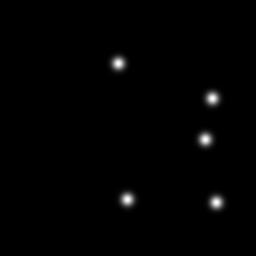

In [3]:
import numpy as np
from skimage.filters import gaussian
import stackview

# ------------------------------------------------------------------
# Parameters
# ------------------------------------------------------------------
image_shape = (256, 256)          # size of each image
object_counts = [5, 10, 20, 40, 80]  # how many bright objects per image
sigma_max = 5.0                  # sigma for the image with the fewest objects
scale = 30.0                     # controls the exponential decay of sigma

# ------------------------------------------------------------------
# Generate images
# ------------------------------------------------------------------
images = []          # will hold the blurred images
sigmas = []          # store the sigma used for each image (optional, for inspection)

for n_objs in object_counts:
    # 1) start with a dark background
    img = np.zeros(image_shape, dtype=np.float32)

    # 2) place random bright points
    ys = np.random.randint(0, image_shape[0], size=n_objs)
    xs = np.random.randint(0, image_shape[1], size=n_objs)
    img[ys, xs] = 1.0          # bright intensity

    # 3) compute sigma (exponential relation: more objects → smaller sigma)
    sigma = sigma_max * np.exp(-n_objs / scale)
    sigmas.append(sigma)

    # 4) apply Gaussian blur
    blurred = gaussian(img, sigma=sigma, truncate=3.0, preserve_range=True)

    # 5) collect result
    images.append(blurred)

# ------------------------------------------------------------------
# (Optional) Show what we generated – using stackview for quick inspection
# ------------------------------------------------------------------
stackview.animate(images)   # interactive viewer to flip through the generated images